<a href="https://colab.research.google.com/github/Hartuty/Machinelearning/blob/master/CAT_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import pandas.util.testing as tm
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LassoCV
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

**i) Data Preparation**

Loading the dataset from sklearn

In [51]:
data= fetch_california_housing()
data

{'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in block\n        - HouseAge      median house age in block\n        - AveRooms      average number of rooms\n        - AveBedrms     average number of bedrooms\n        - Population    block population\n        - AveOccup      average house occupancy\n        - Latitude      house block latitude\n        - Longitude     house block longitude\n\n    :Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttp://lib.stat.cmu.edu/datasets/\n\nThe target variable is the median house value for California districts.\n\nThis dataset was derived from the 1990 U.S. census, using one row per census\nblock group. A block group is the smallest geograp

Output the California Data

In [52]:

#Converting to Dataframe format using pandas
new_data=pd.DataFrame(data.data, columns=data.feature_names)
new_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


Finding Missing Values


In [53]:
new_data.head(20).isnull().sum().sum()
#The data does not have any missing Values

0

Beggining of Encoding and Feature Selection

In [54]:
column_names=data.feature_names
target=data.target
categorical_data=new_data
numerical=['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup']

for feature in column_names:
  categorical_data[feature]=categorical_data[feature].astype('category')

for feature in numerical:
  categorical_data[feature]= categorical_data[feature].cat.codes

categorical_data



,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,12416,40,17422,4683,296,6200,37.88,-122.23
1,12411,20,15292,1747,2346,2171,37.86,-122.22
2,11941,51,18851,8436,469,9150,37.85,-122.24
3,10269,51,13297,8416,531,6102,37.85,-122.25
4,6656,51,15461,8951,538,2620,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,740,24,8473,11414,818,6253,39.48,-121.09
20636,3179,17,14726,13437,330,12675,39.49,-121.21
20637,1037,16,9514,10951,980,3757,39.43,-121.22
20638,1405,17,10299,12362,714,2249,39.43,-121.32


Drop Location Details from the dataset 


In [0]:
categorical_data.drop('Latitude',axis=1,inplace=True)
categorical_data.drop('Longitude',axis=1,inplace=True)

Combining Data with the target

In [56]:
data_copy=categorical_data.copy()

#Generating dataframe from target array
dataset = pd.DataFrame({'Target':data.target})
dataset


temp_data = pd.concat([data_copy,dataset],axis=1)
temp_data


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Target
0,12416,40,17422,4683,296,6200,4.526
1,12411,20,15292,1747,2346,2171,3.585
2,11941,51,18851,8436,469,9150,3.521
3,10269,51,13297,8416,531,6102,3.413
4,6656,51,15461,8951,538,2620,3.422
...,...,...,...,...,...,...,...
20635,740,24,8473,11414,818,6253,0.781
20636,3179,17,14726,13437,330,12675,0.771
20637,1037,16,9514,10951,980,3757,0.923
20638,1405,17,10299,12362,714,2249,0.847


Slicing the Data


In [57]:
all_features = list(temp_data.columns)
X = temp_data.loc[:,all_features].values
y = temp_data.loc[:,['Target']].values
y

array([[4.526],
       [3.585],
       [3.521],
       ...,
       [0.923],
       [0.847],
       [0.894]])

Standardize X

In [58]:
X = StandardScaler().fit_transform(X)
X

array([[ 1.88280191,  0.98214266,  1.39664548, ..., -1.28809653,
        -0.59536054,  2.12963148],
       [ 1.88133306, -0.60701891,  1.01265515, ...,  1.29226284,
        -1.34674917,  1.31415614],
       [ 1.74326137,  1.85618152,  1.65426152, ..., -1.07033937,
        -0.04520009,  1.25869341],
       ...,
       [-1.46000195, -0.92485123, -0.0289862 , ..., -0.4271376 ,
        -1.05096799, -0.99274649],
       [-1.35189475, -0.84539315,  0.11253136, ..., -0.76195496,
        -1.33220255, -1.05860847],
       [-0.95618715, -1.00430931,  0.02455611, ...,  0.05117292,
        -0.46033811, -1.01787803]])

Calculation of Pricipal Components

In [59]:
#Principle components
pca=PCA(n_components=5)
pc_s=pca.fit_transform(X)
#Returning Principle Components
pca_data=pd.DataFrame(pc_s,columns=['PC1','PC2','PC3','PC4','PC5'])
final_data = pd.concat([pca_data,dataset],axis=1)
final_data

,PC1,PC2,PC3,PC4,PC5,Target
0,3.149807,-1.720124,0.306544,-0.405629,0.358846,4.526
1,2.760000,0.472480,0.388247,1.621699,-0.614997,3.585
2,2.439989,-1.558567,0.048763,-1.223119,1.384052,3.521
3,1.637353,-1.963016,-0.132619,-0.427829,1.139497,3.413
4,1.232461,-2.221450,-0.794961,-0.304465,0.964771,3.422
...,...,...,...,...,...,...
20635,-1.695531,-0.225352,-1.568692,-0.525932,-0.379190,0.781
20636,-0.799852,0.588449,-1.661786,-2.074731,-0.173721,0.771
20637,-1.343360,0.089845,-1.892499,-0.153518,-0.875002,0.923
20638,-1.234447,-0.184414,-2.338734,-0.372928,-0.879774,0.847


Calculating the Variance

In [0]:
arr=pca.explained_variance_ratio_

Finding the total variance

In [61]:
sum =0
for i in range(0, len(arr)):    
   sum = sum + arr[i];
Variance=sum*100


print('PCA variance is '+str(Variance) +'%')

PCA variance is 92.324677105507%


**ii) Using Seabon Plot**

Using Seabon Library to pair a plot of all attributes to the Target

Plot of Median Income and Target

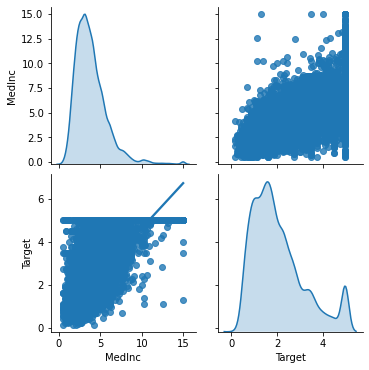

In [62]:
plot_data=pd.DataFrame(data.data, columns=data.feature_names)
target_data=pd.DataFrame({'Target':data.target})
data_MedInc=pd.concat([plot_data['MedInc'],target_data],axis=1)
data_MedInc
sns.pairplot(data_MedInc,kind='reg',diag_kind='kde')

Plot of HouseAge and Target

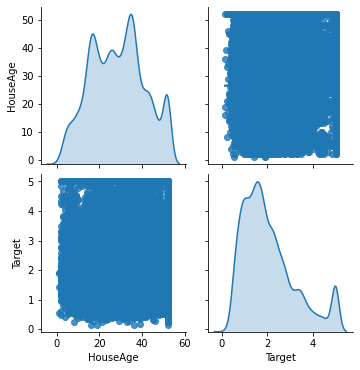

In [63]:
data_plot=pd.concat([plot_data['HouseAge'],target_data],axis=1)
data_plot
sns.pairplot(data_plot,kind='reg',diag_kind='kde')

Plot of Average Rooms and Target

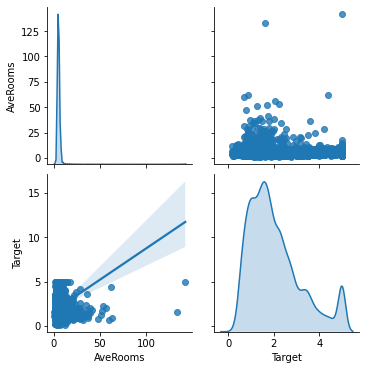

In [64]:
data_plot=pd.concat([plot_data['AveRooms'],target_data],axis=1)
data_plot
sns.pairplot(data_plot,kind='reg',diag_kind='kde')

Plot fo Average Bedrooms and Target

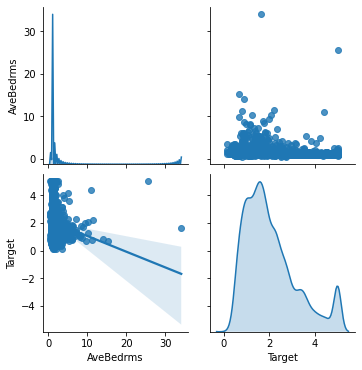

In [65]:
data_plot=pd.concat([plot_data['AveBedrms'],target_data],axis=1)
data_plot
sns.pairplot(data_plot,kind='reg',diag_kind='kde')

Plot of Population and Target

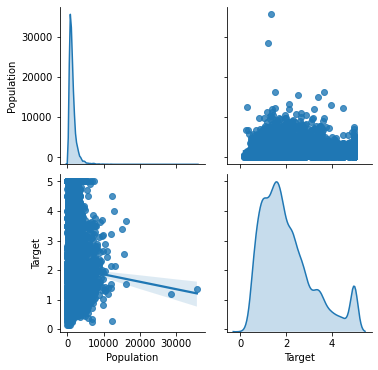

In [66]:
data_plot=pd.concat([plot_data['Population'],target_data],axis=1)
data_plot
sns.pairplot(data_plot,kind='reg',diag_kind='kde')

Plot of Average Occupancy and Target

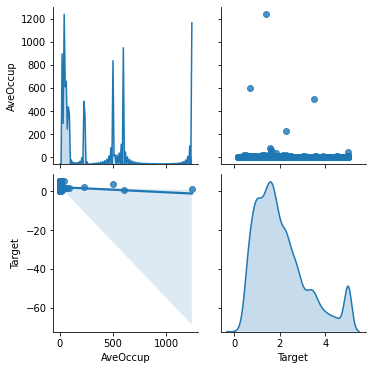

In [67]:
data_plot=pd.concat([plot_data['AveOccup'],target_data],axis=1)
data_plot
sns.pairplot(data_plot,kind='reg',diag_kind='kde')

**iii) Model Selection iv)Hyperparameter Tuning**

We will use Regression model and we will use Linear Regression to predict the Target Value

Usage of Multiple Linear Regression

**Data Splitting** X and y into training and testing sets using train_set_split from sklearn

In this code the test_size is 60% of the dataset and the test size is 40% of the dataset

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y.ravel(), test_size=0.4, train_size=0.6, random_state=0) 

Using Linear Regression object from sklearn to Calculate 

In [0]:
reg = linear_model.LinearRegression()


Training the model using the training sets

In [111]:
reg.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Showing the regression Coefficients

In [112]:
reg.coef_

array([ 1.41278385e-15, -4.44089210e-16, -1.49880108e-15,  5.55111512e-16,
        1.04256881e-15, -1.53349555e-15,  1.15392820e+00])

Showing the variance Score

In [113]:
reg.score(X_test, y_test)

1.0

Ploting the result

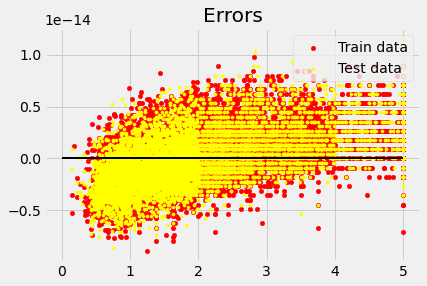

In [114]:
plt.style.use('fivethirtyeight') 
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train, color = "red", s = 20, label = 'Train data') #Error in train data
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test, color = "yellow", s = 10, label = 'Test data') #Error in Test data
plt.hlines(y = 0, xmin = 0, xmax = 5, linewidth = 2) #Residual Error Line
plt.legend(loc = 'upper right') 
plt.title("Errors") 
plt.show() 

**v) Cross Validation** using K-Fold Cross Validation

We used the RBF kernel of the SVR model, implemented using the sklearn library,

We have set the folds to be 10

The error metric computed using the best_svr.score() function is the r2 score. Each iteration of F-Fold CV provides an r2 score. 

We append each score to a list and get the mean value in order to determine the overall accuracy of the model.

In [124]:
values = []

best_svr = SVR(kernel='rbf')

cv = KFold(n_splits=10, random_state=42, shuffle=False)

for train_index, test_index in cv.split(X):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

    # Specifying the Train data set
    best_svr.fit(X_train, y_train)
    values.append(best_svr.score(X_test, y_test.ravel()))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Index:  [ 2064  2065  2066 ... 20637 20638 20639] 

Test Index:  [   0    1    2 ... 2061 2062 2063]
Train Index:  [    0     1     2 ... 20637 20638 20639] 

Test Index:  [2064 2065 2066 ... 4125 4126 4127]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Index:  [    0     1     2 ... 20637 20638 20639] 

Test Index:  [4128 4129 4130 ... 6189 6190 6191]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Index:  [    0     1     2 ... 20637 20638 20639] 

Test Index:  [6192 6193 6194 ... 8253 8254 8255]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Index:  [    0     1     2 ... 20637 20638 20639] 

Test Index:  [ 8256  8257  8258 ... 10317 10318 10319]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Index:  [    0     1     2 ... 20637 20638 20639] 

Test Index:  [10320 10321 10322 ... 12381 12382 12383]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Index:  [    0     1     2 ... 20637 20638 20639] 

Test Index:  [12384 12385 12386 ... 14445 14446 14447]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Index:  [    0     1     2 ... 20637 20638 20639] 

Test Index:  [14448 14449 14450 ... 16509 16510 16511]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Index:  [    0     1     2 ... 20637 20638 20639] 

Test Index:  [16512 16513 16514 ... 18573 18574 18575]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Index:  [    0     1     2 ... 18573 18574 18575] 

Test Index:  [18576 18577 18578 ... 20637 20638 20639]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Showing the accuracy of the model we calculate the mean of the values

In [125]:
print(np.mean(values))

0.9965626243331132


**What happens when we increase the value of K?**

We can use cross_val_score from sklearn to implement the same method

In [119]:
value2=cross_val_score(best_svr, X, y.ravel(), cv=200)# Reduce cv for faster computation time
print(np.mean(value2))

0.9874819063669491


**CONCLUSION**

When we increase the value of K the level of accuracy seems to reduce